In [1]:
with open('./SMSSpamCollection') as f:
    message = f.readlines()

In [2]:
message[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'

In [3]:
import pandas as pd

data = pd.read_csv('./SMSSpamCollection',sep='\t', names= ['labels', 'message'])
data

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
data['len'] = data['message'].str.len()
data

,labels,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<Axes: xlabel='len', ylabel='Count'>

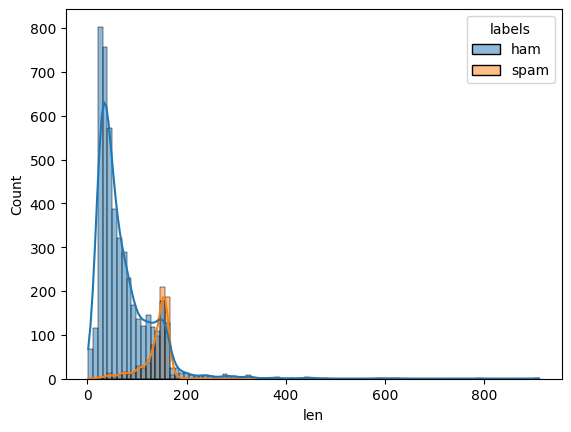

In [7]:
import seaborn as sns

sns.histplot(
    data = data,
    x = "len",
    kde = True,
    hue = "labels"
   
)

In [8]:
!pip install nltk


In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mohiuddin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mohiuddin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
no_punc = []

In [12]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')


stop_words = set(stopwords.words('english'))

def text_process(mess):
    # Remove puncuation
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # Tokenize
    tokens = word_tokenize(nopunc.lower())
    
    # Remove Stopwords
    return [word for word in tokens if word not in stop_words]

# apply dataframe
data['message'] = data['message'].apply(text_process)


print(data[['message']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mohiuddin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mohiuddin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/mohiuddin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             message
0  [go, jurong, point, crazy, available, bugis, n...
1                     [ok, lar, joking, wif, u, oni]
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...
3      [u, dun, say, early, hor, u, c, already, say]
4  [nah, dont, think, goes, usf, lives, around, t...


In [21]:
len(data[['message']])

5572

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['message'])

In [20]:
#bag of words transformer


print(f"Total number of vocabularies in the bag of words: {len(bow_transformer.vocabulary_)}")

Total number of vocabularies in the bag of words: 5148


In [22]:
mess4 = data['message'][3]
print(f'Message 4: {mess4}')

Message 4: ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']


In [23]:
bow4 = bow_transformer.transform([mess4])
print(bow4)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1 stored elements and shape (1, 5148)>
  Coords	Values
  (0, 4295)	1


In [24]:
bow4.shape

(1, 5148)

In [25]:
msg_bow = bow_transformer.transform(data['message'])
print(f"shape of the matrix: {msg_bow.shape}")

shape of the matrix: (5572, 5148)


In [26]:
msg_bow.nnz

5634

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit(msg_bow)

# transforming the bag of words
tfidf4 = tfidf.transform(bow4) # passing the bag of words of message 4

print(f"TFIDF of message 4: \n{tfidf4}")



TFIDF of message 4: 
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (1, 5148)>
  Coords	Values
  (0, 4295)	1.0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['labels'], test_size=0.3)

In [34]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # bow is the name of the step and CountVectorizer is the transformer
    ('tfidf', TfidfTransformer()), # tfidf is the name of the step and TfidfTransformer is the transformer
    ('classifier', MultinomialNB()) # classifier is the name of the step and MultinomialNB is the estimator
])

In [35]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('bow', ...), ('tfidf', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (strip_accents and lowercase) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [36]:
predictions = pipeline.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.86      1.00      0.93      1442
        spam       0.00      0.00      0.00       230

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.74      0.86      0.80      1672



[[1442    0]
 [ 230    0]]


/home/mohiuddin/Mchaine/Complete-Machine-Learning/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mohiuddin/Mchaine/Complete-Machine-Learning/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mohiuddin/Mchaine/Complete-Machine-Learning/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr